In [429]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [469]:
batters = pd.read_json('batters_stats.json')
batters = batters[['year','name','pos','age','status','prev_team','new_team','dollars','years_signed','stats_1yr_ago','stats_2yr_ago','stats_3yr_ago']]

# Data Cleaning

In [470]:
# cast the dollars column from string to int
if batters['dollars'].dtype == 'object':
    batters['dollars'] = batters['dollars'].str.replace('$','').str.replace(',','')
    
batters['dollars'] = batters['dollars'].astype('int64')

In [472]:
batters.head()

,year,name,pos,age,status,prev_team,new_team,dollars,years_signed,stats_1yr_ago,stats_2yr_ago,stats_3yr_ago
0,2006,Moises Alou,LF,39,Signed (A),Giants,Mets,8500000,1,"{'GP': '98', 'AB': '345', 'R': '52', 'H': '104...","{'GP': '123', 'AB': '427', 'R': '67', 'H': '13...","{'GP': '155', 'AB': '601', 'R': '106', 'H': '1..."
1,2006,Rich Aurilia,1B,34,Signed (A),Reds,Giants,8000000,2,"{'GP': '122', 'AB': '440', 'R': '61', 'H': '13...","{'GP': '114', 'AB': '426', 'R': '61', 'H': '12...","{'GP': '124', 'AB': '399', 'R': '49', 'H': '98..."
2,2006,Paul Bako,C,33,Signed,Royals,Orioles,900000,1,"{'GP': '56', 'AB': '153', 'R': '7', 'H': '32',...","{'GP': '13', 'AB': '40', 'R': '1', 'H': '10', ...","{'GP': '49', 'AB': '138', 'R': '13', 'H': '28'..."
3,2006,Rod Barajas,C,30,Signed,Rangers,Phillies,2500000,1,"{'GP': '97', 'AB': '344', 'R': '49', 'H': '88'...","{'GP': '120', 'AB': '410', 'R': '53', 'H': '10...","{'GP': '108', 'AB': '358', 'R': '50', 'H': '89..."
4,2006,Gary Bennett,C,34,Signed,Cardinals,Cardinals,900000,1,"{'GP': '60', 'AB': '157', 'R': '13', 'H': '35'...","{'GP': '68', 'AB': '199', 'R': '11', 'H': '44'...","{'GP': '75', 'AB': '219', 'R': '18', 'H': '49'..."


In [473]:
# replace 'None' values with zeros
for index, row in batters.iterrows():
    for key, value in row['stats_1yr_ago'].items():
        if value == 'None':
            row['stats_1yr_ago'][key] = '0'
    for key, value in row['stats_2yr_ago'].items():
        if value == 'None':
            row['stats_2yr_ago'][key] = '0'
    for key, value in row['stats_3yr_ago'].items():
        if value == 'None':
            row['stats_3yr_ago'][key] = '0'

In [474]:
# create an AAV column, for average annual contract value
aav = []
for index, row in batters.iterrows():
    aav.append(int(row['dollars']/row['years_signed']))

batters['aav'] = aav

In [475]:
# create a column for the 3-year total of each batter stat
for stat in batters['stats_1yr_ago'][0]:
    stat_list = []
    
    for index, row in batters.iterrows():
        stat_1 = float(row['stats_1yr_ago'][stat])
        stat_2 = float(row['stats_2yr_ago'][stat])
        stat_3 = float(row['stats_3yr_ago'][stat])   
        stat_list.append(stat_1 + stat_2 + stat_3)

    batters[stat + '_3yr'] = stat_list

In [476]:
# calculate 3-year average stats
avg = []
obp = []
slg = []

for index, row in batters.iterrows():
    if row['AB_3yr'] == 0:
        avg.append(0)
        obp.append(0)
        slg.append(0)
    else:
        avg.append(
            float(
                row['H_3yr']/row['AB_3yr']
            )
        )
        obp.append(
            float(
                (row['H_3yr'] + row['BB_3yr']) / row['AB_3yr']
            )
        )
        slg.append(
            float(
                (row['H_3yr'] + row['2B_3yr'] + 2*row['3B_3yr'] + 3*row['HR_3yr']) / row['AB_3yr']
            )
        )
batters['AVG_3yr'] = avg
batters['OBP_3yr'] = obp
batters['SLG_3yr'] = slg

batters.head()

,year,name,pos,age,status,prev_team,new_team,dollars,years_signed,stats_1yr_ago,...,RBI_3yr,BB_3yr,HBP_3yr,SO_3yr,SB_3yr,CS_3yr,WAR_3yr,AVG_3yr,OBP_3yr,SLG_3yr
0,2006,Moises Alou,LF,39,Signed (A),Giants,Mets,8500000,1,"{'GP': '98', 'AB': '345', 'R': '52', 'H': '104...",...,243.0,152.0,4.0,154.0,10.0,2.0,8.2,0.303714,0.414421,0.548434
1,2006,Rich Aurilia,1B,34,Signed (A),Reds,Giants,8000000,2,"{'GP': '122', 'AB': '440', 'R': '61', 'H': '13...",...,182.0,108.0,6.0,189.0,6.0,0.0,2.8,0.276680,0.362055,0.441107
2,2006,Paul Bako,C,33,Signed,Royals,Orioles,900000,1,"{'GP': '56', 'AB': '153', 'R': '7', 'H': '32',...",...,24.0,33.0,2.0,87.0,1.0,0.0,-0.5,0.211480,0.311178,0.259819
3,2006,Rod Barajas,C,30,Signed,Rangers,Phillies,2500000,1,"{'GP': '97', 'AB': '344', 'R': '49', 'H': '88'...",...,159.0,56.0,13.0,184.0,0.0,1.0,2.4,0.252698,0.303058,0.444245
4,2006,Gary Bennett,C,34,Signed,Cardinals,Cardinals,900000,1,"{'GP': '60', 'AB': '157', 'R': '13', 'H': '35'...",...,63.0,54.0,4.0,99.0,1.0,1.0,-2.1,0.222609,0.316522,0.309565


# Data Analysis

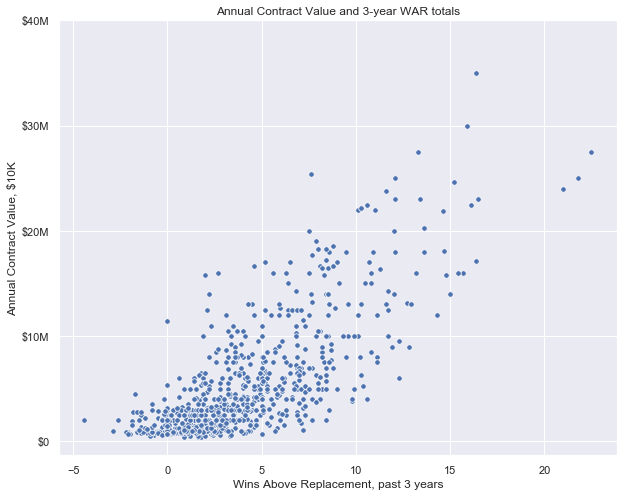

In [477]:
fig, ax = plt.subplots(figsize=(10,8))

sns.scatterplot(x=batters['WAR_3yr'],y='aav',data=batters, s=30, ax=ax)
plt.title('Annual Contract Value and 3-year WAR totals')
plt.xlabel('Wins Above Replacement, past 3 years')
plt.ylabel('Annual Contract Value, $10K')
plt.yticks([0,10000000,20000000,30000000,40000000],['$0','$10M','$20M','$30M','$40M'])  

plt.show()

# Linear Relationships

In [438]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score

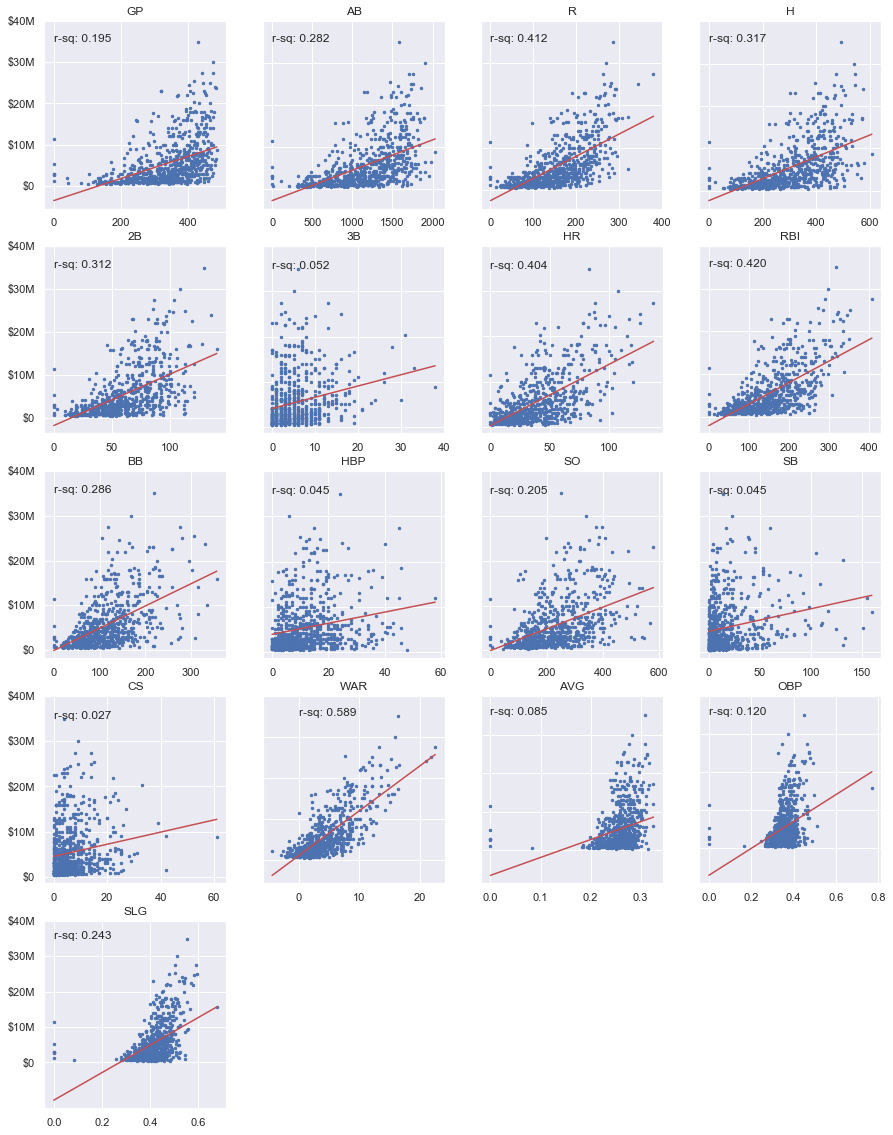

In [559]:
fig = plt.figure(figsize=(15,20))
for i in range(0,17):
    ax = fig.add_subplot(5,4,i+1)

    col = batters.loc[:,'GP_3yr':].columns[i]
    stat = col.replace('_3yr','')
      
    x = batters.sort_values(col)[[col]].values
    y = batters.sort_values(col)['aav'].values

    poly = PolynomialFeatures(degree=1)
    x_poly = poly.fit_transform(x.reshape(-1,1))

    model = LinearRegression()
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly)

    ax.plot(x,y_pred, c='r')
    ax.scatter(x,y,s=6)
    ax.set_yticks([0,10000000,20000000,30000000,40000000])  
    if i%4 == 0:
        ax.set_yticklabels(['$0','$10M','$20M','$30M','$40M'])
    else:
        ax.set_yticklabels([])
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(stat)
    
    ax.text(0,35000000,'r-sq: ' + str(r2_score(y, y_pred))[:5])

plt.show()

## Position Dummy Variables

In [479]:
# correct outfield positions
batters.loc[batters['name']=='Jose Cruz Jr.', 'pos'] = 'LF'
batters.loc[batters['name']=='So Taguchi', 'pos'] = 'LF'
batters.loc[batters['name']=='Fred Lewis', 'pos'] = 'LF'
batters.loc[batters['name']=='Carlos Beltran', 'pos'] = 'CF'

batters = pd.get_dummies(batters, columns=['pos'])
batters.head()

,year,name,age,status,prev_team,new_team,dollars,years_signed,stats_1yr_ago,stats_2yr_ago,...,SLG_3yr,pos_1B,pos_2B,pos_3B,pos_C,pos_CF,pos_DH,pos_LF,pos_RF,pos_SS
0,2006,Moises Alou,39,Signed (A),Giants,Mets,8500000,1,"{'GP': '98', 'AB': '345', 'R': '52', 'H': '104...","{'GP': '123', 'AB': '427', 'R': '67', 'H': '13...",...,0.548434,0,0,0,0,0,0,1,0,0
1,2006,Rich Aurilia,34,Signed (A),Reds,Giants,8000000,2,"{'GP': '122', 'AB': '440', 'R': '61', 'H': '13...","{'GP': '114', 'AB': '426', 'R': '61', 'H': '12...",...,0.441107,1,0,0,0,0,0,0,0,0
2,2006,Paul Bako,33,Signed,Royals,Orioles,900000,1,"{'GP': '56', 'AB': '153', 'R': '7', 'H': '32',...","{'GP': '13', 'AB': '40', 'R': '1', 'H': '10', ...",...,0.259819,0,0,0,1,0,0,0,0,0
3,2006,Rod Barajas,30,Signed,Rangers,Phillies,2500000,1,"{'GP': '97', 'AB': '344', 'R': '49', 'H': '88'...","{'GP': '120', 'AB': '410', 'R': '53', 'H': '10...",...,0.444245,0,0,0,1,0,0,0,0,0
4,2006,Gary Bennett,34,Signed,Cardinals,Cardinals,900000,1,"{'GP': '60', 'AB': '157', 'R': '13', 'H': '35'...","{'GP': '68', 'AB': '199', 'R': '11', 'H': '44'...",...,0.309565,0,0,0,1,0,0,0,0,0


## Contract Value Prediction

In [578]:
# linear regression with positional dummies
mlr = LinearRegression()
x = batters[['WAR_3yr', 'pos_C','pos_1B','pos_2B','pos_3B','pos_SS','pos_LF','pos_CF','pos_RF','pos_DH']]
y = batters['aav']
mlr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [579]:
input_war = 10
input_pos = '1B'

positions = ['pos_C','pos_1B','pos_2B','pos_3B','pos_SS','pos_LF','pos_CF','pos_RF','pos_DH']
input_array = []
input_array.append(input_war)

for i in range(len(positions)):
    if input_pos == positions[i].replace('pos_',''):
        input_array.append(1)
    else:
        input_array.append(0)

prediction = mlr.predict(np.array([input_array]))
print('${:,.0f}'.format(prediction[0]))

$12,137,324
